# Assignment Week 4
## Group Assignment (Group 10)

#### 1. Write a program that uses both upward and downward recursion to calculate the spherical Bessel function $j_{l}\left(  x\right)$ for the first 25 $l$ values for $x=0.1,1,10$. Tune your program so that at lease one method gives "good" values (meaning a relative error $\simeq 10^{-10}$).

#### a) Show the convergence and stability of your results.

#### b) Compare the upward and downward recursion methods, printing out $l,$ $j_{l}^{\left(\text{up}\right)  },$ $j_{l}^{\left(\text{down}\right)},$ and the relative difference $\left\vert j_{l}^{\left(  \text{up}\right)}-j_{l}^{\left(\text{down}\right)}\right\vert \left/  \left(  \left\vert j_{l}^{\left(  \text{up}\right)  }\right\vert +\left\vert j_{l}^{\left(\text{down}\right)}\right\vert \right)  \right.$.

We first consider the upward recursion
$$
j_{l+1}(x)=\frac{2l+1}{x}j_l(x)-j_{l-1}(x)
$$

In [1]:
import numpy as np

x = float(input('x = '))  # input x = 0.1,1,10
#x = 1

# exact spherical Bessel function for l = 0,1
j0 = lambda x: np.sin(x) / x
j1 = lambda x: np.sin(x) / x**2 - np.cos(x) / x

# upward
j_up = [j0(x), j1(x)]  # store the values of differnet l's

for l in range(1, 25):
    # the recursion
    j_ = (2*l + 1) / x * j_up[-1] - j_up[-2]
    j_up.append(j_)
    

x = 1


The we apply the downward recursion
$$
j_{l-1}(x)=\frac{2l+1}{x}j_l(x)-j_{l+1}(x)
$$
Notice that the initial condition $j_L$ and $j_{L+1}$ can have arbitrary values, but the final result should be normalized:
$$
j_l^n(x)=j_l^c(x)\times\frac{j_0^{\rm analytic}(x)}{j_0^c(x)}
$$

In [2]:
L=50  # the initial l

# the initial conditon
jL1 = 1  # j_{L+1}
jL = 1   # J_L

# downward
j_c = [jL1, jL]  # store the values of differnet l's

for l in range(L-1, 0, -1):
    # the recursion
    j_ = (2*l + 1) / x * j_c[-1] - j_c[-2]
    j_c.append(j_)

j_down = np.array(j_c)*j0(x) / j_c[-1]  # normalization


Now we show the result and compare. From `scipy.special` we can obtain the **correct** values of the spherical Bessel functions.

In [3]:
from scipy.special import *

# print the result and compare
print(' 1        j_up             j_down          j_correct')
print('---------------------------------------------------------')
for l in range(26):
    print('%2d%18.10e%18.10e%18.10e' % (l, j_up[l], j_down[L-l], spherical_jn(l,x)))

 1        j_up             j_down          j_correct
---------------------------------------------------------
 0  8.4147098481e-01  8.4147098481e-01  8.4147098481e-01
 1  3.0116867894e-01  3.0116867894e-01  3.0116867894e-01
 2  6.2035052011e-02  6.2035052011e-02  6.2035052011e-02
 3  9.0065811171e-03  9.0065811171e-03  9.0065811171e-03
 4  1.0110158084e-03  1.0110158084e-03  1.0110158084e-03
 5  9.2561158570e-05  9.2561158611e-05  9.2561158611e-05
 6  7.1569358637e-06  7.1569363101e-06  7.1569363101e-06
 7  4.7900765821e-07  4.7901341987e-07  4.7901341987e-07
 8  2.8179009348e-08  2.8264988022e-08  2.8264988022e-08
 9  3.5500713480e-11  1.4913765026e-09  1.4913765026e-09
10 -2.7504495792e-08  7.1165526400e-11  7.1165526400e-11
11 -5.7762991235e-07  3.0995518548e-12  3.0995518548e-12
12 -1.3257983488e-05  1.2416625970e-13  1.2416625970e-13
13 -3.3087195729e-04  4.6046376777e-15  4.6046376777e-15
14 -8.9202848634e-03  1.5895759875e-16  1.5895759875e-16
15 -2.5835738908e-01  5.1326861154

From the above we can conclude that the result converges only when using the **downward recursion** and it gives "good" values that have **relative error less than $10^{-10}$**.

Calculate and show the relative difference:

In [4]:
print(' l   diff_r\n--------------')
for l in range(26):
    diff_r = abs(j_up[l] - j_down[L-l]) / (abs(j_up[l]) + abs(j_down[L-l]))
    print('%2d  %.3e' % (l, diff_r))

 l   diff_r
--------------
 0  0.000e+00
 1  1.843e-16
 2  1.342e-15
 3  3.804e-14
 4  2.291e-12
 5  2.215e-10
 6  3.118e-08
 7  6.014e-06
 8  1.523e-03
 9  9.535e-01
10  1.000e+00
11  1.000e+00
12  1.000e+00
13  1.000e+00
14  1.000e+00
15  1.000e+00
16  1.000e+00
17  1.000e+00
18  1.000e+00
19  1.000e+00
20  1.000e+00
21  1.000e+00
22  1.000e+00
23  1.000e+00
24  1.000e+00
25  1.000e+00


#### 2.Suppose that the equations of motion for a projectile are 
$$
    \begin{aligned}
    y&=f(t)=9600(1-e^{-t/15})-480t\\
    x&=r(t)=2400(1-e^{-t/15})
    \end{aligned}
$$
#### a) Find the elapsed time until impact accurate to 10 decimal places.

#### b) Find the range accurate to 10 decimal places.

####    by applying

####    1) the bisection algorithm,

####    2) the inverse interpolation method, and

####    3) the secant method.

####    Please compare your results. 
    
**Hint**: Please read the sample scripts first.

In [5]:
# method 1 the bisection algorithm
import sys
import math

def bisection(f, x_L, x_R, eps):
    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print("""Error! Function does not have opposite 
                 signs at interval endpoints!""")
        sys.exit(1)
    x_M = (x_L + x_R)/2.0
    f_M = f(x_M)
    iteration_counter = 1

    while abs(f_M) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
        x_M = (x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter = iteration_counter + 1
    return x_M, iteration_counter

if __name__ == '__main__':
    def f(x):
        return 9600*(1-math.exp(-x/15))-480*x
    def g(x):
        return 2400*(1-math.exp(-x/15)) 
    
    a = 1;   b = 100
    
    solution, no_iterations = bisection(f, a, b, eps=1.0e-11)
    
    print('Number of function calls: {:d}'.format(1 + 2*no_iterations))
    print('The elapsed time is: {:.10f}'.format(solution))
    print('The range is: {:.10f}'.format(g(solution)))

Number of function calls: 97
The elapsed time is: 9.0878996688
The range is: 1090.5479602542


In [6]:
# method 2  the inverse interpolation method
def secant(f, x0, x1, eps):
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x0) > eps:
        denominator = (f_x1 - f_x0)/(x1 - x0)
        x = x1 - f_x1/denominator
        x0 = x
        f_x0 = f(x0)
        iteration_counter = iteration_counter + 1
    return x, iteration_counter

if __name__ == '__main__':
    def f(x):
        return 9600*(1-math.exp(-x/15))-480*x
    def g(x):
        return 2400*(1-math.exp(-x/15)) 
    x0 = 1; x1 =100
    solution, no_iterations = secant(f, x0, x1, eps=1.0e-11)
    print('Number of function calls: {:d}'.format(2+no_iterations))
    print('The elapsed time is: {:.10f}'.format(solution))
    print('The range is: {:.10f}'.format(g(solution)))
    

Number of function calls: 96
The elapsed time is: 9.0878996688
The range is: 1090.5479602542


In [7]:
# method 3 the secant method
def secant(f, x0, x1, eps):
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x1) > eps and iteration_counter < 100:
        try:
            denominator = (f_x1 - f_x0)/(x1 - x0)
            x = x1 - f_x1/denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for x = ', x)
            sys.exit(1) 
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iteration_counter = iteration_counter + 1
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x, iteration_counter

if __name__ == '__main__':
    def f(x):
        return 9600*(1-math.exp(-x/15))-480*x
    def g(x):
        return 2400*(1-math.exp(-x/15)) 
    x0 = 100; x1 =1000
    solution, no_iterations = secant(f, x0, x1, eps=1.0e-11)
    if no_iterations > 0: 
        print('Number of function calls: {:d}'.format(2+no_iterations))
        print('The elapsed time is: {:.10f}'.format(solution))
        print('The range is: {:.10f}'.format(g(solution)))
    else:
        print('Solution not found!')
        

Number of function calls: 11
The elapsed time is: 9.0878996688
The range is: 1090.5479602542


#### conclusion:

We can see from the result that if the accuracy is determined(10 decimal places), the result is utterly equal by applying these three different methods. 

Reaching the same accuracy, three methods go through different numbers of function calls. We can see that to solve this question, the secant method is the best, the inverse interpolation method is the second best, and the bisection algorithm is the third best.


#### 3. Solve Nonlinear Equation for a Vibrating Beam  
#### An important engineering problem that arises in a lot of applications is the vibrations of a clamped beam where the other end is free. This problem can be analyzed analytically, but the calculations boil down to solving the following nonlinear algebraic equation:

$$
\cosh \beta \cos \beta = −1
$$

#### where $\beta$ is related to important beam parameters through
$$
 \beta^4 = \omega^2\frac{\rho A}{EI}
$$

#### a) Plot the equation to be solved so that one can inspect where the zero crossings occur.  

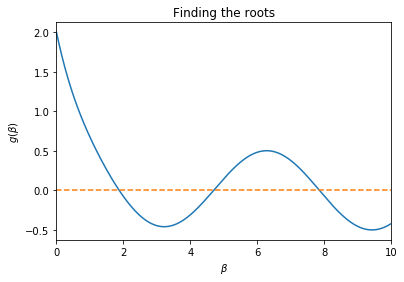

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

f = lambda x: np.cosh(x) * np.cos(x) + 1  # function such that f(beta) = 0

beta = np.linspace(0,10,1000)  # beta ranges [0, 10]
g = np.exp(-beta) * f(beta)  # g = exp(-beta) * f

h = np.zeros(1000)  # the line y = 0

# plot the curves
plt.plot(beta, g)
plt.plot(beta, h, linestyle = '--')

# beautify the plot
plt.title('Finding the roots')
plt.xlim(0,10)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$g(\beta)$')

plt.show()

From the plot we can see that the first three roots are respectively in the range **[1, 2], [4, 5] and [7, 8]**.

#### b) Compute the first three frequencies.

We believe the secant method may be the most effective for this problem after answering the last question.

First we define a `method` called `secant` that can print the solution and the number of function calls for a given function, a fixed interval and the preset tolerance $\epsilon$.

In [9]:
import sys

def secant(f, x0, x1, eps):
    f_x0 = f(x0)
    f_x1 = f(x1)
    count = 0
    while abs(f_x1) > eps and count < 100:
        try:
            denominator = (f_x1 - f_x0)/(x1 - x0)
            x = x1 - f_x1/denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for x = ', x)
            sys.exit(1)  # abort with error
        
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        
        count += 1
    
    # either a solution is found, or too many iterations
    if abs(f_x1) > eps:  # solution not found
        count = -1

    if count > 0:  # solution found
        print('Number of function calls: {:d}'.format(2+count))
        print('A solution is: {:f}'.format(x))
    else:
        print('Solution not found!')

Then we apply the `method` just defined to find the first three roots in the three intervals.

In [10]:
secant(f, 1, 2, eps=1.0e-6)
print()
secant(f, 4, 5, eps=1.0e-6)
print()
secant(f, 7, 8, eps=1.0e-6)

Number of function calls: 7
A solution is: 1.875104

Number of function calls: 9
A solution is: 4.694091

Number of function calls: 8
A solution is: 7.854757


Having known the value of $\beta$'s, plug

$$
\rho=7850\ {\rm kg/m^3},\quad A=25\times 8=200\ {\rm mm^2},\quad E=2\times 10^{11}\ {\rm Pa},\quad I=\frac{25\times 8^3}{12}=
\frac{3200}{3}\ {\rm mm^4}
$$
into
$$
\beta^4 = \omega^2\frac{\rho A}{EI}
$$
We finally get the first three frequencies,which are
$$
\omega_1 = 41.0\ {\rm Hz},\quad\omega_2=257\ {\rm Hz},\quad\omega_3=719\ {\rm Hz}
$$